In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset to python environment

In [2]:
data = pd.read_excel("/content/iris (1).xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
for i in ['SL','SW','PL']:
  data[i] = data[i].fillna(data[i].median())

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Do the necessary pre-processing steps

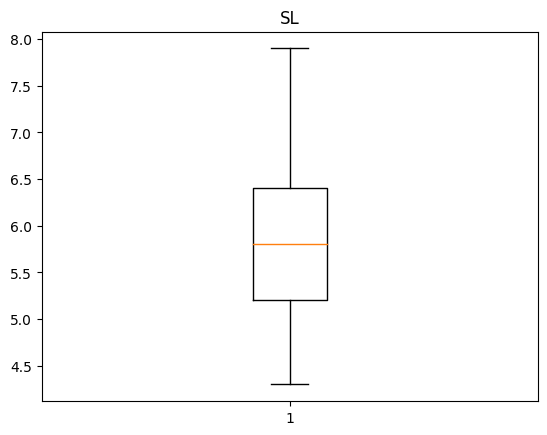

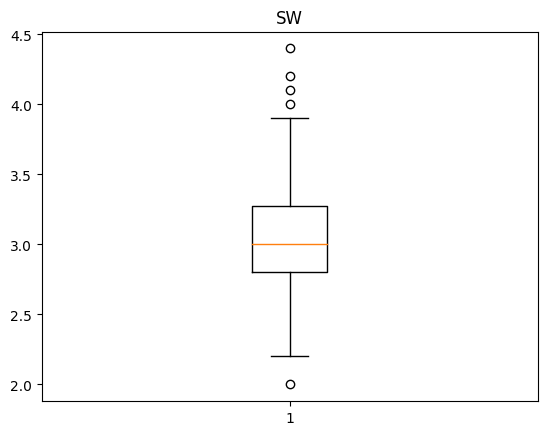

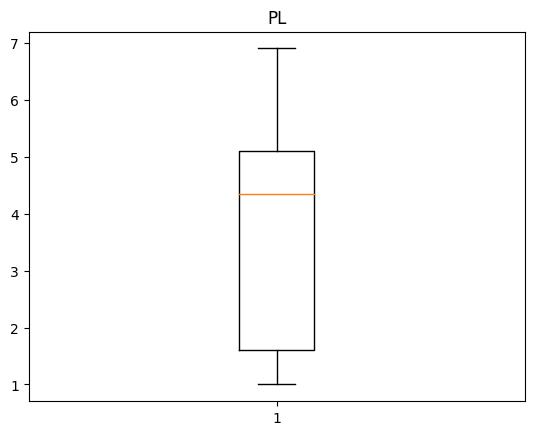

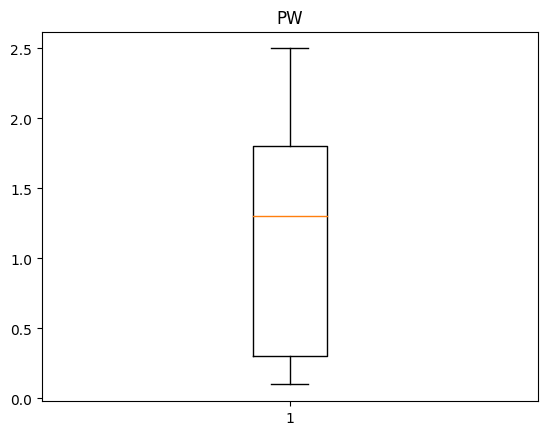

In [6]:
num_columns = ['SL','SW','PL','PW']
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [7]:
Q1 = np.percentile(data['SW'],25, method="midpoint")
Q2 = np.percentile(data['SW'],50, method="midpoint")
Q3 = np.percentile(data['SW'],75, method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

q1 is 2.8
q2 is 3.0
q3 is 3.25
min is 2.1249999999999996
max is 3.9250000000000003


In [8]:
outlier = []
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [9]:
ind_SW = data["SW"]>up_lim
ind_SW = data.loc[ind_SW].index
ind_SW

Int64Index([14, 15, 32, 33], dtype='int64')

In [10]:
data.drop(ind_SW, inplace= True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
y = data['Classification']
x = data.drop(['Classification'],axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
y_predictions = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [19]:
confusion_matrix(y_test,y_predictions)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [20]:
y_predictions

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [21]:
print('Accuracy =',accuracy_score(y_test,y_predictions))

Accuracy = 0.9333333333333333


### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
metric_k = []
neighbors = np.arange(3,15)

In [24]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

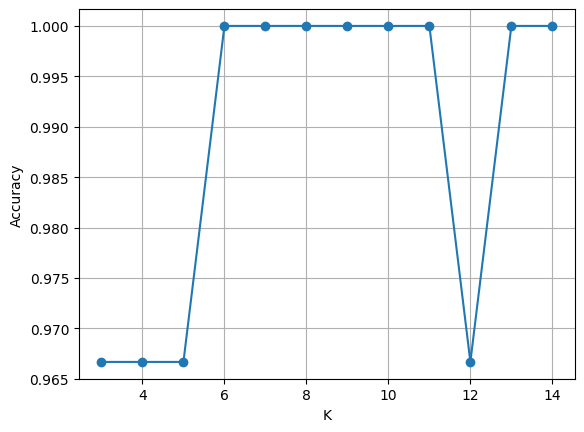

In [25]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [27]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

In [28]:
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 0.9666666666666667


### SVM

In [29]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
confusion_matrix(y_test,y_pred_svm)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

In [32]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

In [33]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [34]:
confusion_matrix(y_test,y_pred_svm)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

In [35]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
model=dt_cls.fit(x_train,y_train)
y_pred_dt=model.predict(x_test)

In [37]:
confusion_matrix(y_test,y_pred_dt)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [38]:
accuracy_score(y_test,y_pred_dt)

0.9333333333333333

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [40]:
confusion_matrix(y_test,y_pred_rf)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [41]:
accuracy_score(y_test,y_pred_rf)

0.9333333333333333